# Importing Packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import gensim.models
import os
import nltk
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


from gensim.test.utils import datapath
from nltk.stem import WordNetLemmatizer
from gensim import utils
from os import listdir
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, manifold, decomposition
from sklearn.metrics import (
    adjusted_rand_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from glob import glob
from matplotlib.image import imread

In [131]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")

[nltk_data] Downloading package punkt to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data

In [132]:
raw_data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
print(raw_data.shape)

(1050, 15)


Creating image list

In [133]:
path = "data/Images/"
image_list = [file for file in listdir(path)]
print(len(image_list))

1050


In [134]:
raw_data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [135]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

There is very little missing data and it concerns columns that will not be useful moving forward.

In [136]:
raw_data.describe(include="all")

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   
mean                                 NaN                        NaN   
std                                  NaN                        NaN   
min                                  NaN                        NaN   
25%                                  NaN                        NaN   
50%                                  NaN                        NaN   
75%                                  NaN                        NaN   
max                                  NaN                        NaN   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

         retail_price  discounted_price                                 image  \
count     1049.000000       1049.000000                                  1050   
unique            NaN               NaN                                  1050   
top               NaN               NaN  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq              NaN               NaN                                     1   
mean      2186.197331       1584.527169                                   NaN   
std       7639.229411       7475.099680                                   NaN   
min         35.000000         35.000000                                   NaN   
25%        555.000000        340.000000                                   NaN   
50%        999.000000        600.000

In [137]:
raw_data.duplicated(subset="uniq_id").sum()

0

# Text Analysis

Identifying the product's category from the category tree

In [138]:
def extract_category(df):
    df["category"] = df["product_category_tree"].apply(
        lambda category_tree: category_tree.split(" >>")[0].replace('["', "")
    )

    return df

In [139]:
data = extract_category(raw_data)

In [140]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

In [141]:
data["category"].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [142]:
categories = data["category"].unique()

le = preprocessing.LabelEncoder()
le.fit(data["category"])
data["encoded_category"] = le.transform(data["category"])
data.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications         category  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

   encoded_category  
0                 4  
1                 0  
2                 0  
3                 4  
4                 4

In [143]:
data.groupby("encoded_category").count()

uniq_id  crawl_timestamp  product_url  product_name  \
encoded_category                                                        
0                     150              150          150           150   
1                     150              150          150           150   
2                     150              150          150           150   
3                     150              150          150           150   
4                     150              150          150           150   
5                     150              150          150           150   
6                     150              150          150           150   

                  product_category_tree  pid  retail_price  discounted_price  \
encoded_category                                                               
0                                   150  150           149               149   
1                                   150  150           150               150   
2                                   150  150           150               150   
3                                   150  150           150               150   
4                                   150  150           150               150   
5                                   150  150           150               150   
6                                   150  150           150               150   

                  image  is_FK_Advantage_product  description  product_rating  \
encoded_category                                                                
0                   150                      150          150             150   
1                   150                      150          150             150   
2                   150                      150          150             150   
3                   150                      150          150             150   
4                   150                      150          150             150   
5                   150                      150          150             150   
6                   150                      150          150             150   

                  overall_rating  brand  product_specifications  category  
encoded_category                                                           
0                            150    134                     150       150  
1                            150     41                     150       150  
2                            150    150                     150       150  
3                            150    148                     149       150  
4                            150    150                     150       150  
5                            150     79                     150       150  
6                            150     10                     150       150

In [144]:
example_description = data["description"][0]
example_description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

## Preprocessing

### Tokenization

In [145]:
print(nltk.tokenize.word_tokenize(example_description))

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', ',', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', '(', '213', 'cm', 'in', 'Height', ',', 'Pack', 'of', '2', ')', 'Price', ':', 'Rs', '.', '899', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors.This', 'curtain', 'is', 'made', 'from', '100', '%', 'high', 'quality', 'polyester', 'fabric.It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring.It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving.This', 'curtain', 'is', 'ant-', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance.Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', '.', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', '.', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when',

In [146]:
tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
print(tokenizer.tokenize(example_description))

['Key', 'Features', 'of', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'Floral', 'Curtain', 'Elegance', 'Polyester', 'Multicolor', 'Abstract', 'Eyelet', 'Door', 'Curtain', 'cm', 'in', 'Height', 'Pack', 'of', 'Price', 'Rs', 'This', 'curtain', 'enhances', 'the', 'look', 'of', 'the', 'interiors', 'This', 'curtain', 'is', 'made', 'from', 'high', 'quality', 'polyester', 'fabric', 'It', 'features', 'an', 'eyelet', 'style', 'stitch', 'with', 'Metal', 'Ring', 'It', 'makes', 'the', 'room', 'environment', 'romantic', 'and', 'loving', 'This', 'curtain', 'is', 'ant', 'wrinkle', 'and', 'anti', 'shrinkage', 'and', 'have', 'elegant', 'apparance', 'Give', 'your', 'home', 'a', 'bright', 'and', 'modernistic', 'appeal', 'with', 'these', 'designs', 'The', 'surreal', 'attention', 'is', 'sure', 'to', 'steal', 'hearts', 'These', 'contemporary', 'eyelet', 'and', 'valance', 'curtains', 'slide', 'smoothly', 'so', 'when', 'you', 'draw', 'them', 'apart', 'first', 'thing', 'in', 

In [147]:
def tokenize_description(description):
    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    return tokenizer.tokenize(description.lower())


def unique_word_count(tokenized_description):
    return len(nltk.FreqDist(tokenized_description).keys())

In [148]:
data["tokenized"] = data["description"].apply(lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [149]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

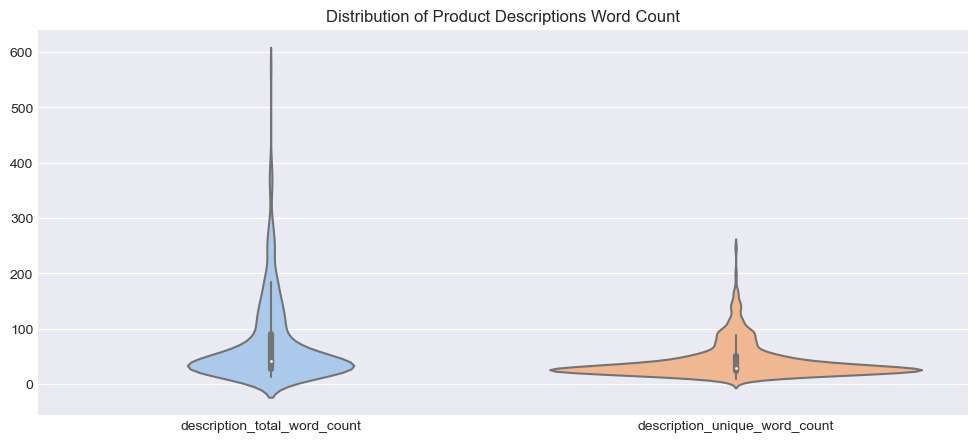

In [150]:
plt.figure(figsize=(12, 5))
sns.violinplot(data[["description_total_word_count", "description_unique_word_count"]])
plt.title("Distribution of Product Descriptions Word Count")
plt.show()

In [151]:
def plot_word_count_by_category(data):
    word_count_by_category = (
        data[
            [
                "description_total_word_count",
                "description_unique_word_count",
                "category",
            ]
        ]
        .groupby("category")
        .mean()
        .sort_values(by="description_total_word_count")
    )

    plt.figure(figsize=(10, 6))
    plt.barh(
        word_count_by_category["description_total_word_count"].index,
        word_count_by_category["description_total_word_count"].values,
        color="#7871AA",
        label="Total Word Count",
    )
    plt.barh(
        word_count_by_category["description_unique_word_count"].index,
        word_count_by_category["description_unique_word_count"].values,
        color="#AA9FB1",
        label="Unique Word Count",
    )
    plt.xlabel("Word Count")
    plt.legend()
    plt.title("Word Count by Category")
    plt.show()

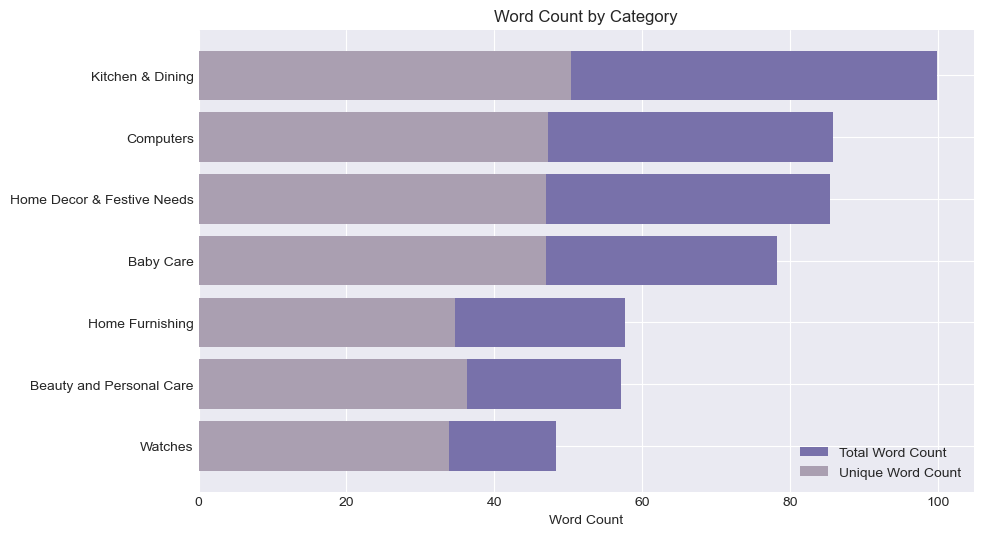

In [152]:
plot_word_count_by_category(data)

The kitchen and dining category seems to have more detailed descriptions as they contain about 100 total words on average and has the highest unique word count. 

Watches on the other hand have more concise descriptions 

### Removing stop words

In [153]:
product_descriptions = data[
    ["tokenized", "description_total_word_count", "description_unique_word_count"]
]
product_descriptions

tokenized  \
0     [key, features, of, elegance, polyester, multi...   
1     [specifications, of, sathiyas, cotton, bath, t...   
2     [key, features, of, eurospa, cotton, terry, fa...   
3     [key, features, of, santosh, royal, fashion, c...   
4     [key, features, of, jaipur, print, cotton, flo...   
...                                                 ...   
1045  [oren, empower, extra, large, self, adhesive, ...   
1046  [wallmantra, large, vinyl, sticker, sticker, p...   
1047  [buy, uberlyfe, extra, large, pigmented, polyv...   
1048  [buy, wallmantra, medium, vinyl, sticker, stic...   
1049  [buy, uberlyfe, large, vinyl, sticker, for, rs...   

      description_total_word_count  description_unique_word_count  
0                              226                            128  
1                               68                             44  
2                              201                            115  
3                              124                             59  
4                              188                             95  
...                            ...                            ...  
1045                           411                            140  
1046                           285                             98  
1047                            35                             27  
1048                            29                             23  
1049                            27                             23  

[1050 rows x 3 columns]

Identifying most frequent words

In [154]:
total_frequency = nltk.Counter()
for key, value in product_descriptions["tokenized"].items():
    total_frequency += nltk.FreqDist(value)

total_frequency_df = pd.DataFrame.from_dict(
    total_frequency, orient="index", columns=["word_count"]
).sort_values(by="word_count", ascending=False)

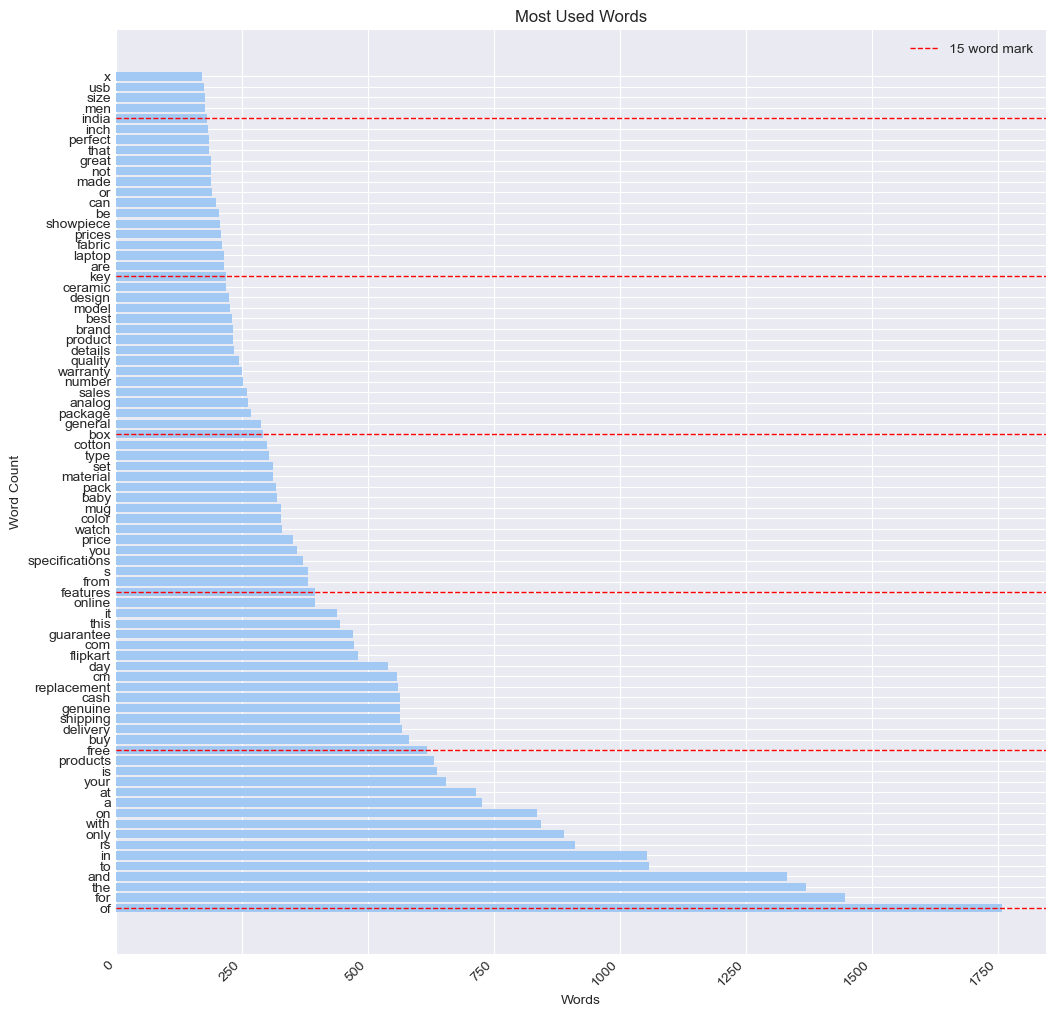

In [155]:
most_frequent_words = total_frequency_df.head(80)

plt.figure(figsize=(12, 12))
plt.barh(most_frequent_words.index, most_frequent_words["word_count"])
plt.xlabel("Words")
plt.ylabel("Word Count")
plt.title("Most Used Words")
plt.xticks(rotation=45, ha="right")
for y in range(0, len(most_frequent_words), 15):
    plt.axhline(
        y,
        color="red",
        linestyle="--",
        linewidth=1,
        label="15 word mark" if y == 0 else "",
    )
plt.legend()
plt.show()

In [156]:
stopwords = set()
stopwords.update(total_frequency_df.head(50).index)
stopwords.update(tuple(nltk.corpus.stopwords.words("english")))
print(stopwords)

{'material', 'those', 'wasn', "you're", 'package', "you'd", 'hers', 'your', 'yourself', 's', "shouldn't", 'itself', "she's", 'we', 'from', 'any', 'i', 't', 'ma', "you've", 'each', 'ourselves', 'replacement', 'as', 'rs', 'whom', 'color', 'out', 'was', 'couldn', 'weren', 'doesn', 'his', 'where', 'yours', 'just', "shan't", "wouldn't", 'if', 'y', 'myself', 'don', 'this', "it's", 'genuine', 'box', 'by', "doesn't", 'its', 'the', "that'll", 'were', 'yourselves', 'her', "you'll", 'why', 'how', 'she', 'through', 'some', 'same', 'm', 'but', 'shipping', 'hadn', 'cm', 'guarantee', 'mug', 'general', 'so', 'off', 'ours', 'pack', 'over', 'll', 'isn', 'been', 'free', 'because', 'further', 'against', 'down', 've', 'both', 'online', 'doing', 'theirs', "couldn't", 'needn', 'no', 'most', 'set', 'on', 'price', 'between', 'products', 'who', 'type', 'me', 'himself', 'am', 'an', 'other', 'once', 'before', 'now', "hasn't", 'below', 're', 'analog', 'while', 'own', 'about', "wasn't", 'mightn', 'can', 'being', 't

Identifying words with only one occurence

In [157]:
unique_words = [word for word, count in total_frequency.items() if count == 1]
print(len(unique_words))

1497


In [158]:
stopwords.update(unique_words)
len(stopwords)

1701

In [159]:
def filter_out_stopwords(tokens, sw):
    filtered_tokens = list()
    filtered_tokens += [word for word in tokens if not word in list(sw)]
    return filtered_tokens

In [160]:
data["tokenized"] = data["description"].apply(
    lambda x: filter_out_stopwords(tokenize_description(x), stopwords)
)
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [161]:
data

uniq_id            crawl_timestamp  \
0     55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1     7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2     64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3     d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4     6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                ...                        ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
1046  fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
1047  5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
1049  f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                            product_url  \
0     http://www.flipkart.com/elegance-polyester-mul...   
1     http://www.flipkart.com/sathiyas-cotton-bath-t...   
2     http://www.flipkart.com/eurospa-cotton-terry-f...   
3     http://www.flipkart.com/santosh-royal-fashion-...   
4     http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                 ...   
1045  http://www.flipkart.com/oren-empower-extra-lar...   
1046  http://www.flipkart.com/wallmantra-large-vinyl...   
1047  http://www.flipkart.com/uberlyfe-extra-large-p...   
1048  http://www.flipkart.com/wallmantra-medium-viny...   
1049  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                  product_category_tree               pid  \
0     ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   
...                                                 ...               ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88ZGTX65GH4V   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZD5GDCVQ   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE5UVGW2JWVWCT   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIEC889ZGFD3RCE   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE2ZEPACRQJKH7   

      retail_price  discounted_price                                 image  \
0           1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1            600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2              NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3           2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4           2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   
...            ...               ...                                   ...   
1045        1399.0             999.0  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046        4930.0            1896.0  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047        4500.0            1449.0  5912e037d12774bb73a2048f35a00009.jpg   
1048        3465.0            1333.0  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1

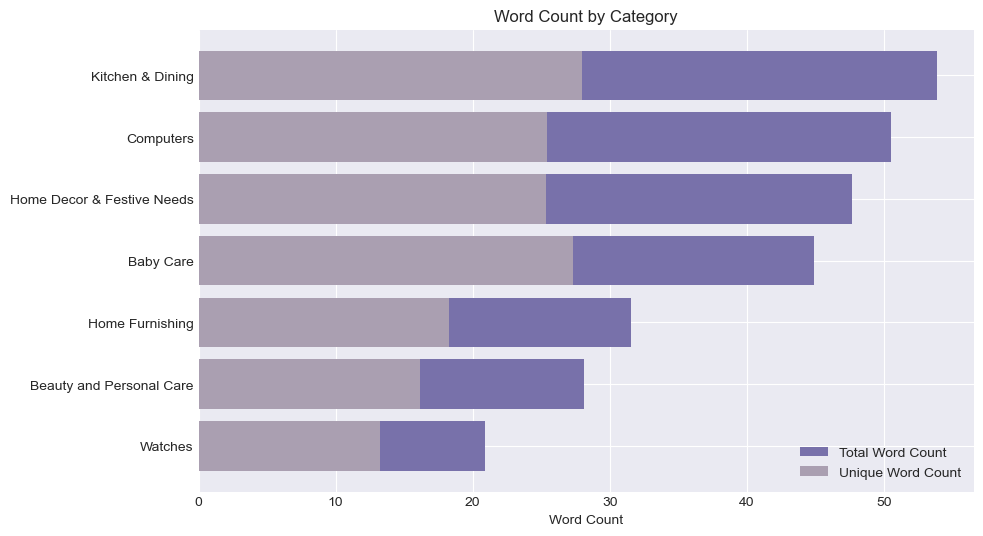

In [162]:
plot_word_count_by_category(data)

When filtering out stopwords, computers have longer descriptions on average than home decor objects. Baby care products have descriptions with the highest unique word count.

### Lemmatization

In [163]:
def tokenize_description(description):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = list()

    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    tokens = tokenizer.tokenize(description.lower())

    filtered_tokens += [
        lemmatizer.lemmatize(word) for word in tokens if word not in list(stopwords)
    ]
    return [word for word in filtered_tokens if len(word) > 2]

In [164]:
data["tokenized"] = data["description"].apply(lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

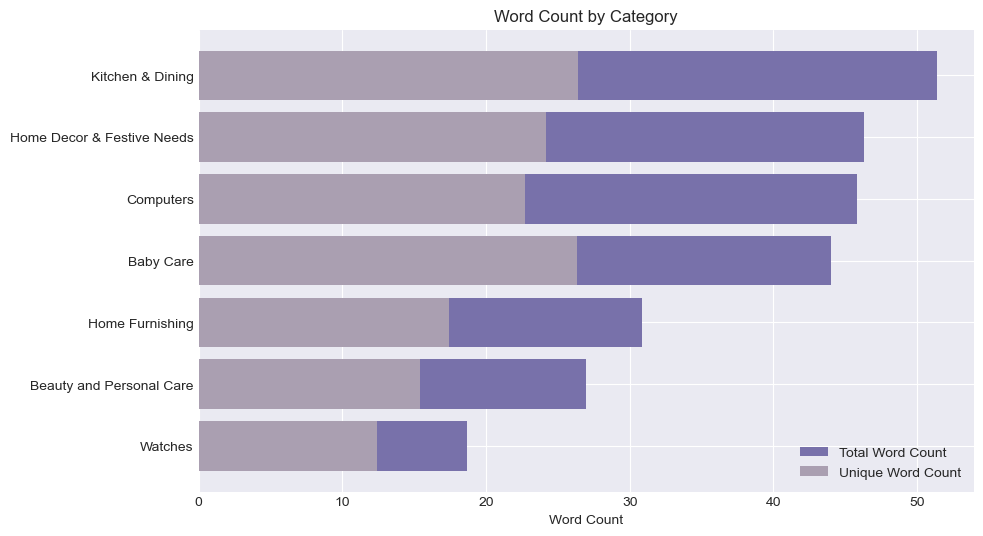

In [165]:
plot_word_count_by_category(data)

### Preprocess descriptions

In [166]:
def tokenize(description):
    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    return tokenizer.tokenize(description.lower())


def remove_stopwords(tokens):
    return [word for word in tokens if word not in stopwords]


def word_check(tokens):
    valid_words_dictionary = set(nltk.corpus.words.words())
    return [word for word in tokens if word in valid_words_dictionary]


def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]


def form_sentence(tokens, min_length=2):
    return " ".join(word for word in tokens if len(word) > min_length)

In [167]:
def full_preprocessing(description):
    tokens = tokenize(description)
    tokens_without_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens_without_stopwords)
    valid_tokens = word_check(lemmatized_tokens)
    return form_sentence(valid_tokens)


def preprocessing_without_word_check(description):
    tokens = tokenize(description)
    tokens_without_stopwords = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize(tokens_without_stopwords)
    return form_sentence(lemmatized_tokens)


def preprocessing_with_stopwords(description):
    tokens = tokenize(description)
    lemmatized_tokens = lemmatize(tokens)
    valid_tokens = word_check(lemmatized_tokens)
    return form_sentence(valid_tokens, 1)

In [168]:
print(data.description[15])
print("\n")
print(full_preprocessing(data.description[15]))
print("\n")
print(preprocessing_without_word_check(data.description[15]))
print("\n")
print(preprocessing_with_stopwords(data.description[15]))

Escort E-1700-906_Blk Analog Watch  - For Men, Boys
                         Price: Rs. 1,829
				
			If you have it, flaunt it! If this is your mantra then hit the streets in style wearing this black coloured analog watch for men from the house of Escort. The casing adds more appeal to this timepiece that can be worn on a rainy day, all thanks to its water resistance upto 10 atm.
If you have it, flaunt it! If this is your mantra then hit the streets in style wearing this black coloured analog watch for men from the house of Escort. The casing adds more appeal to this timepiece that can be worn on a rainy day, all thanks to its water resistance upto 10 atm.


escort men boy flaunt mantra hit street style wearing black men house escort casing add appeal timepiece worn rainy thanks water resistance flaunt mantra hit street style wearing black men house escort casing add appeal timepiece worn rainy thanks water resistance


escort blk men boy flaunt mantra hit street style wearing black c

In [169]:
data["preprocessing_full"] = data["description"].apply(lambda x: full_preprocessing(x))
data["preprocessing_without_word_check"] = data["description"].apply(
    lambda x: preprocessing_without_word_check(x)
)
data["preprocessing_with_sw"] = data["description"].apply(
    lambda x: preprocessing_with_stopwords(x)
)

In [170]:
text_data = data[
    [
        "category",
        "encoded_category",
        "description",
        "preprocessing_full",
        "preprocessing_without_word_check",
        "preprocessing_with_sw",
    ]
]
text_data

category  encoded_category  \
0     Home Furnishing                 4   
1           Baby Care                 0   
2           Baby Care                 0   
3     Home Furnishing                 4   
4     Home Furnishing                 4   
...               ...               ...   
1045        Baby Care                 0   
1046        Baby Care                 0   
1047        Baby Care                 0   
1048        Baby Care                 0   
1049        Baby Care                 0   

                                            description  \
0     Key Features of Elegance Polyester Multicolor ...   
1     Specifications of Sathiyas Cotton Bath Towel (...   
2     Key Features of Eurospa Cotton Terry Face Towe...   
3     Key Features of SANTOSH ROYAL FASHION Cotton P...   
4     Key Features of Jaipur Print Cotton Floral Kin...   
...                                                 ...   
1045  Oren Empower Extra Large Self Adhesive Sticker...   
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...   
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...   
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...   
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...   

                                     preprocessing_full  \
0     key elegance polyester multicolor abstract eye...   
1     bath towel bath towel red yellow blue bath tow...   
2     key terry face towel size small height inch te...   
3     key royal fashion printed king sized double ro...   
4     key print floral king sized double print flora...   
...                                                 ...   
1045  empower extra large self adhesive sticker doub...   
1046  large vinyl sticker sticker bring home exclusi...   
1047  extra large polyvinyl film sticker extra large...   
1048  medium vinyl sticker sticker medium vinyl stic...   
1049  large vinyl sticker large vinyl sticker best p...   

                       preprocessing_without_word_check  \
0     key elegance polyester multicolor abstract eye...   
1     sathiyas bath towel bath towel red yellow blue...   
2     key eurospa terry face towel size small height...   
3     key santosh royal fashion printed king sized d...   
4     key jaipur print floral king sized double beds...   
...                                                 ...   
1045  empower extra large self adhesive sticker doub...   
1046  wallmantra large vinyl sticker sticker bring h...   
1047  uberlyfe extra large pigmented polyvinyl film ...   
1048  wallmantra medium vinyl sticker sticker wallma...   
1049  uberlyfe large vinyl sticker uberlyfe large vi...   

                                  preprocessing_with_sw  
0     key feature of elegance polyester multicolor a...  
1     specification of cotton bath towel bath towel ...  
2     key feature of cotton terry face towel set siz...  
3     key feature of royal fashion cotton printed ki...  
4     key feature of print cotton floral king sized ...  
...                                                 ...  
1045  empower extra large self adhesive sticker pack...  
1046  large vinyl sticker sticker pack of price brin...  
1047  buy extra large polyvinyl film sticker for ext...  
1048  buy medium vinyl sticker sticker for medium vi...  
1049  buy large vinyl sticker for large vinyl sticke...  

[1050 rows x 6 columns]

## Bag of Words

In [171]:
def get_tsne_data(values):
    tsne = manifold.TSNE(
        n_components=2, perplexity=30, n_iter=2000, init="random", random_state=42
    )
    X_tsne = tsne.fit_transform(values)
    df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
    df_tsne["category"] = data["category"]
    return X_tsne, df_tsne


def get_kmeans_labels(values):
    kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto")
    return kmeans.fit(values).labels_

In [172]:
def plot_tsne(values):
    X_tsne, df_tsne = get_tsne_data(values)

    predicted_labels = get_kmeans_labels(X_tsne)

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=df_tsne["category"],
        data=df_tsne,
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[0],
    )
    axes[0].set_title("TSNE by True Categories")
    axes[0].legend(prop={"size": 10}, bbox_to_anchor=(1, 1))

    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=predicted_labels,
        data=df_tsne,
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[1],
    )
    axes[1].set_title("TSNE by Kmeans Labels")
    axes[1].legend(prop={"size": 12}, bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

    print(
        "The Adjusted Rand Index is: ",
        np.round(adjusted_rand_score(data.encoded_category, predicted_labels), 2),
    )

### CountVectorizer

With full preprocessing
- lower case 
- stopword removal (most and less frequent)
- invalid word removal (based on nlkr words)
- lemmatization

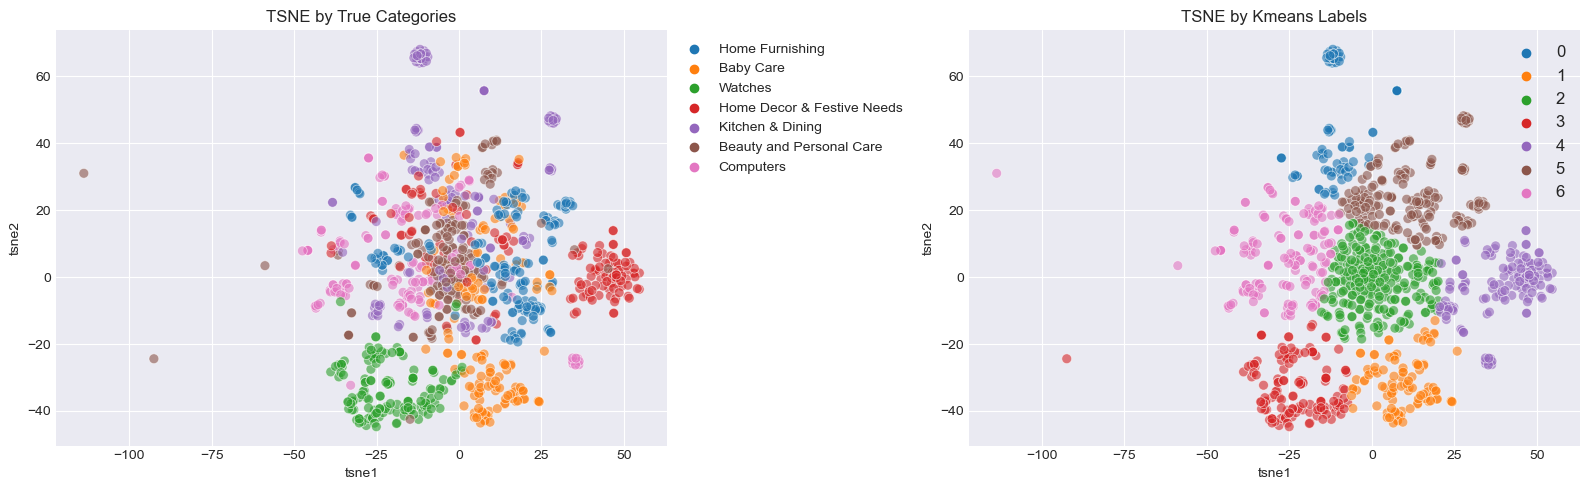

The Adjusted Rand Index is:  0.28


In [173]:
count_vectorizer = CountVectorizer()
plot_tsne(count_vectorizer.fit_transform(text_data["preprocessing_full"]))

With preprocessing without word check
- lower case 
- stopword removal (most and less frequent)
- lemmatization

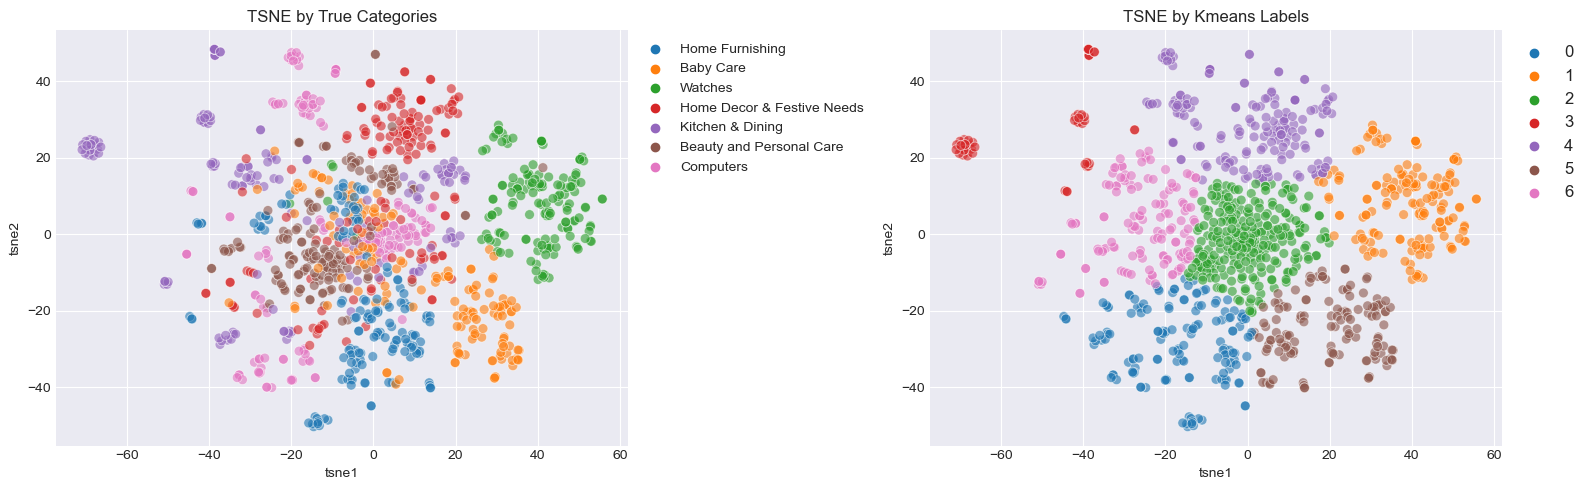

The Adjusted Rand Index is:  0.26


In [174]:
count_vectorizer = CountVectorizer()
plot_tsne(
    count_vectorizer.fit_transform(text_data["preprocessing_without_word_check"])
)

The count vectorizer does not provide clear clusters when plotting the products according to their true categories. The kMeans yields distinct clusters but the ari of .26 illustrates that they are quite different from the clusters by category.

### TF-IDF

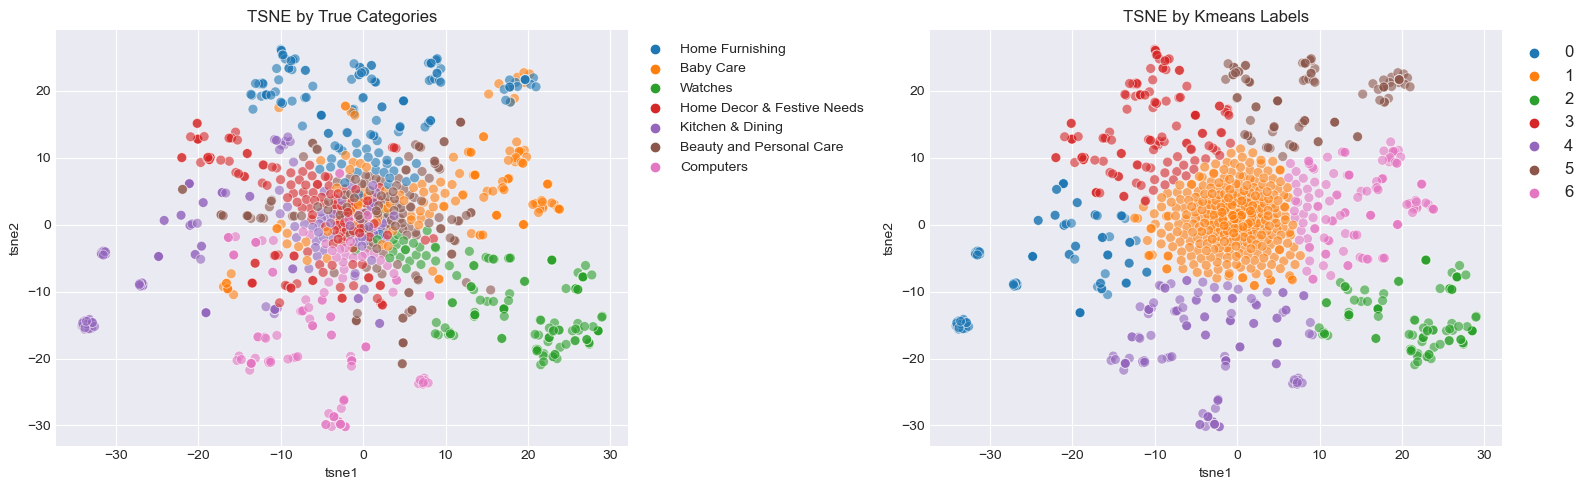

The Adjusted Rand Index is:  0.25


In [175]:
tfidf = TfidfVectorizer()
tfidf_values = tfidf.fit_transform(text_data["preprocessing_full"])
plot_tsne(tfidf_values)

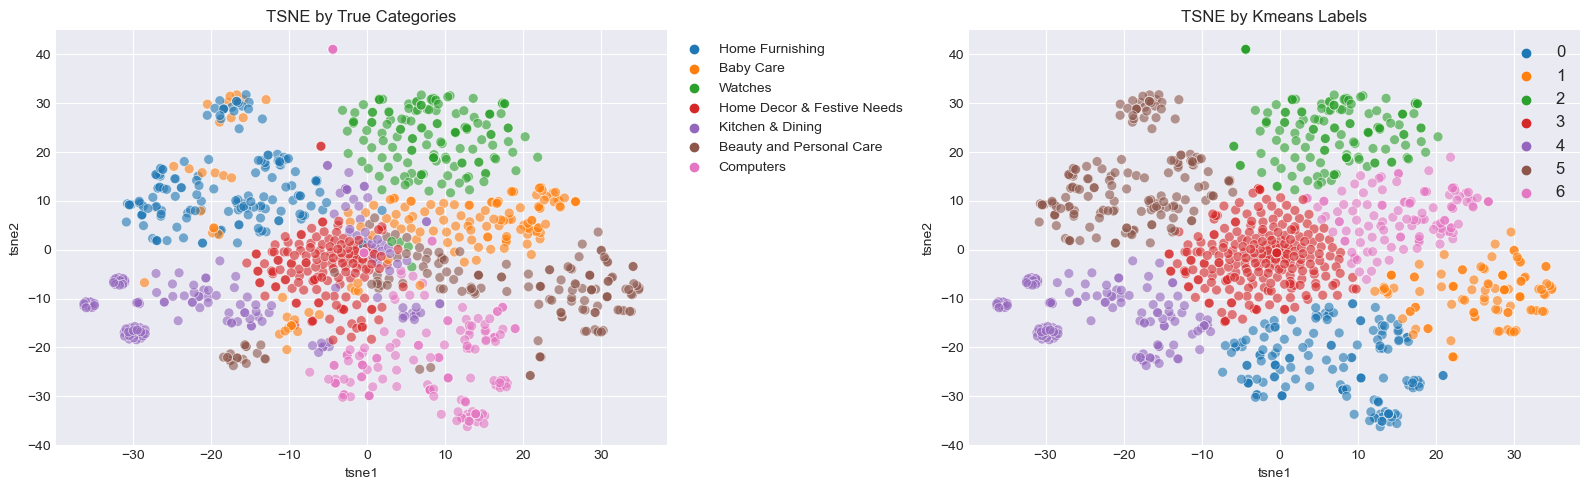

The Adjusted Rand Index is:  0.54


In [176]:
tfidf = TfidfVectorizer()
tfidf_values = tfidf.fit_transform(text_data["preprocessing_without_word_check"])
plot_tsne(tfidf_values)

There is a big difference in ARI values when the data has been preprocessed with and without word check. The score without the word check being much higher, we can assume that the word dictionary used might not contain words that are domain specific and thus remove important words. 

Nevertheless, these results support the feasability of a classification engine as we can see distinct clusters that are quite similar to the clusters from the true categories. 
Cluster 3, for example, which represents the watches category, is quite distinct, as well as cluster 4, home decor. 

The ARI of .5 matches with the visual representations of the clusters and also supports the feasability of the classification engine. 

SVM

In [177]:
len(tfidf.vocabulary_)

3158

In [178]:
df_svm = pd.DataFrame(
    tfidf_values.todense().tolist(),
    columns=tfidf.get_feature_names_out(),
)
df_svm

aapno  aari  ability  abkl  able  abode  abroad  absorbency  absorbent  \
0       0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1       0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
2       0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.068321        0.0   
3       0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
4       0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
...     ...   ...      ...   ...   ...    ...     ...         ...        ...   
1045    0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1046    0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1047    0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1048    0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   
1049    0.0   0.0      0.0   0.0   0.0    0.0     0.0    0.000000        0.0   

      absorbing  ...  youth  youthful  yuva  zero  zinc  zingalalaa  zipper  \
0           0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
1           0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
2           0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
3           0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
4           0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
...         ...  ...    ...       ...   ...   ...   ...         ...     ...   
1045        0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
1046        0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
1047        0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
1048        0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   
1049        0.0  ...    0.0       0.0   0.0   0.0   0.0         0.0     0.0   

      zone  zora  zyxel  
0      0.0   0.0    0.0  
1      0.0   0.0    0.0  
2      0.0   0.0    0.0  
3      0.0   0.0    0.0  
4      0.0   0.0    0.0  
...    ...   ...    ...  
1045   0.0   0.0    0.0  
1046   0.0   0.0    0.0  
1047   0.0   0.0    0.0  
1048   0.0   0.0    0.0  
1049   0.0   0.0    0.0  

[1050 rows x 3158 columns]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
    df_svm, data.encoded_category, test_size=0.2
)

svc = LinearSVC()
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)

encoded_categories = data.groupby("category").first().reset_index()
results = pd.DataFrame(
    f1_score(y_test, y_predicted, average=None), columns=["F1 Score"]
)
results["Category"] = encoded_categories.category
results

F1 Score                    Category
0  0.884615                   Baby Care
1  0.942857    Beauty and Personal Care
2  0.953846                   Computers
3  0.914286  Home Decor & Festive Needs
4  0.977778             Home Furnishing
5  0.960000            Kitchen & Dining
6  1.000000                     Watches

In [180]:
adjusted_rand_score(y_test, y_predicted)

0.8804473067950667

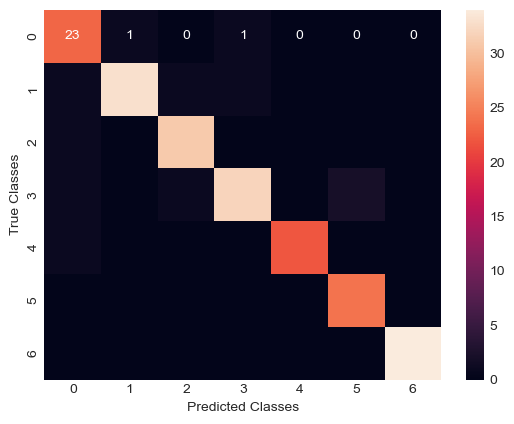

In [181]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.show()

The results of the SVM model yield good results and illustrate the feasability of the classification engine based on the product's descriptions. 

Latent Dirichlet Allocation

In [182]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=7,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=42,
)

lda.fit(tfidf_values)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=42)

In [183]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
            )
        )


no_top_words = 10
display_topics(lda, tfidf.get_feature_names_out(), no_top_words)

Topic 0:
sticker skin laptop design towel inch detail multicolor polyester ceramic
Topic 1:
combo playboy deodorant paris andre anna london aero dark lunch
Topic 2:
edimax combo archies film polyvinyl pigmented uberlyfe wild imported extra
Topic 3:
men discount india great sonata woman dial strap kadhai maximum
Topic 4:
combo comforter quilt tenda single usb kit floral hub abstract
Topic 5:
showpiece router price wireless best link handicraft dsl asus band
Topic 6:
cell battery laptop woman pavilion time wedding lapguard apple party


The topics generated by the LDA model are hard to interpret and distinguish from one another

## Word Embedding

### Word2Vec

Training own model

In [184]:
def train_word2vec(data):
    model = gensim.models.Word2Vec(min_count=5, window=10, seed=42, vector_size=300)
    sentences = [gensim.utils.simple_preprocess(text) for text in data]
    model.build_vocab(sentences)
    model.train(sentences, total_examples=model.corpus_count, epochs=100)
    max_sentence_length = max(len(sentence) for sentence in sentences)
    print(model.vector_size)
    return model, sentences, max_sentence_length

In [185]:
model_full_preprocessing, sentences, max_sentence_length = train_word2vec(
    clean_data["preprocessing_full"]
)
print("Computer: ", model_full_preprocessing.wv.most_similar("computer"))
print("Curtain: ", model_full_preprocessing.wv.most_similar("curtain"))

300
Computer:  [('vacuum', 0.7979774475097656), ('attachment', 0.7752310037612915), ('cleaner', 0.7356078028678894), ('connect', 0.7035356163978577), ('port', 0.6783851981163025), ('device', 0.6697474122047424), ('plug', 0.6243221759796143), ('cleaning', 0.5845441818237305), ('air', 0.5578715801239014), ('dust', 0.5522972345352173)]
Curtain:  [('eyelet', 0.5818368792533875), ('ring', 0.54378741979599), ('door', 0.5182441473007202), ('attention', 0.5113933086395264), ('maroon', 0.4723329246044159), ('appeal', 0.44980719685554504), ('vibrant', 0.43994706869125366), ('polyester', 0.4151749610900879), ('finish', 0.41075682640075684), ('lasting', 0.4090687334537506)]


In [186]:
print(model_full_preprocessing.wv.similarity(w1="home", w2="furnishing"))
print(model_full_preprocessing.wv.similarity(w1="watch", w2="computer"))

0.31159085
0.02450535


In [187]:
for index, word in enumerate(model_full_preprocessing.wv.index_to_key):
    if index == 20:
        break
    print(f"word #{index}/{len(model_full_preprocessing.wv.index_to_key)} is {word}")

word #0/1158 is design
word #1/1158 is number
word #2/1158 is warranty
word #3/1158 is quality
word #4/1158 is detail
word #5/1158 is girl
word #6/1158 is inch
word #7/1158 is brand
word #8/1158 is product
word #9/1158 is best
word #10/1158 is key
word #11/1158 is model
word #12/1158 is ceramic
word #13/1158 is fabric
word #14/1158 is price
word #15/1158 is showpiece
word #16/1158 is size
word #17/1158 is made
word #18/1158 is great
word #19/1158 is boy


Evaluating semantic similarities using the academic dataset WS-353

In [188]:
model_full_preprocessing.wv.evaluate_word_pairs(datapath("wordsim353.tsv"))

(PearsonRResult(statistic=0.17982872323260948, pvalue=0.4116127177698408),
 SignificanceResult(statistic=0.06719367588932806, pvalue=0.760653161138472),
 93.48441926345609)

Creating padded sequences from tokenized descriptions

In [189]:
def get_padded_sequences(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    x_sentences = pad_sequences(
        tokenizer.texts_to_sequences(sentences),
        maxlen=max_sentence_length,
        padding="post",
    )

    num_words = len(tokenizer.word_index) + 1
    print("Number of unique words: %i" % num_words)
    
    return x_sentences, tokenizer


def create_embedding_model(model, tokenizer, max_sentence_length):
    w2v_size = model.wv.vector_size
    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, w2v_size))
    i = 0
    j = 0

    for word, idx in word_index.items():
        i += 1
        if word in model.wv.index_to_key:
            j += 1
            embedding_vector = model.wv[word]
            if embedding_vector is not None:
                embedding_matrix[idx] = model.wv[word]

    word_rate = np.round(j / i, 4)
    print("Word embedding rate : ", word_rate)
    print("Embedding matrix: %s" % str(embedding_matrix.shape))

    word_input = Input(shape=(max_sentence_length,), dtype="float64")
    word_embedding = Embedding(
        input_dim=vocab_size,
        output_dim=w2v_size,
        weights=[embedding_matrix],
        input_length=max_sentence_length,
    )(word_input)
    word_vec = GlobalAveragePooling1D()(word_embedding)
    embed_model = Model([word_input], word_vec)
    print(embed_model.summary())

    return embed_model

In [190]:
sequences, tokenizer = get_padded_sequences(sentences)
embed_model = create_embedding_model(
    model_full_preprocessing, tokenizer, max_sentence_length
)

Number of unique words: 2268
Word embedding rate :  0.5108
Embedding matrix: (2268, 300)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 274)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 274, 300)          680400    
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 680,400
Trainable params: 680,400
Non-trainable params: 0
_________________________________________________________________
None


 1/33 [..............................] - ETA: 0s

33/33 [==============================] - 0s 2ms/step


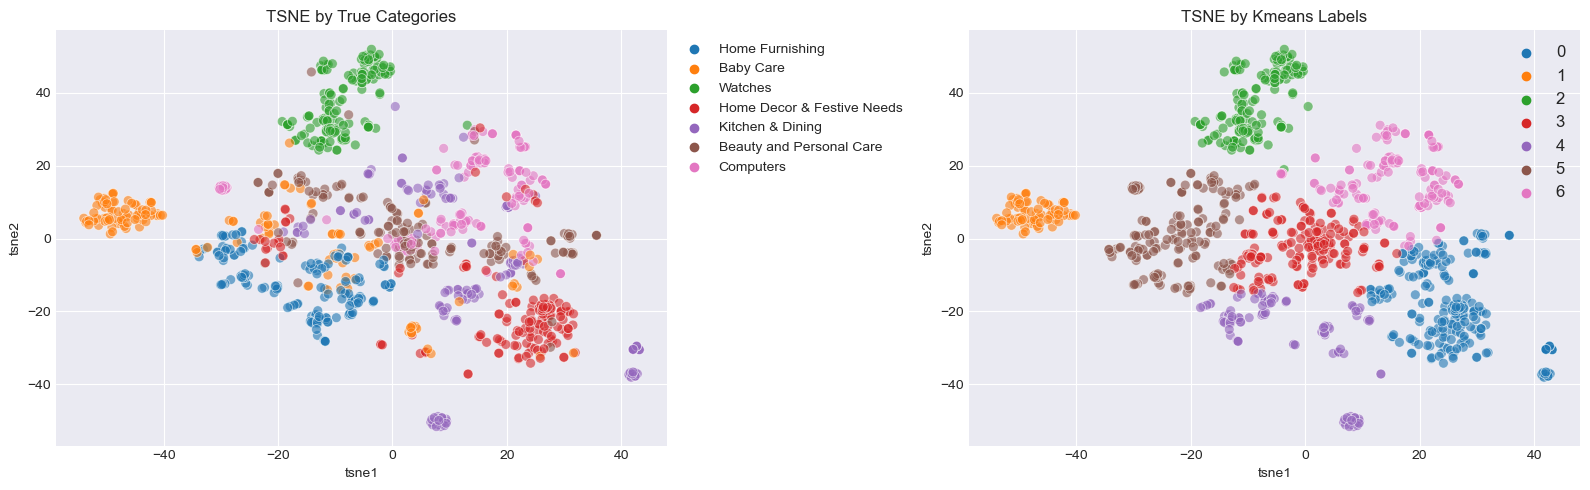

The Adjusted Rand Index is:  0.35


In [191]:
plot_tsne(embed_model.predict(sequences))

In [192]:
model_full_preprocessing, sentences, max_sentence_length = train_word2vec(
    text_data["preprocessing_without_word_check"]
)
sequences, tokenizer = get_padded_sequences(sentences)
embed_model = create_embedding_model(
    model_full_preprocessing, tokenizer, max_sentence_length
)

300
Number of unique words: 3157
Word embedding rate :  0.4477
Embedding matrix: (3157, 300)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 302)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 302, 300)          947100    
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 947,100
Trainable params: 947,100
Non-trainable params: 0
_________________________________________________________________
None


33/33 [==============================] - 0s 1ms/step


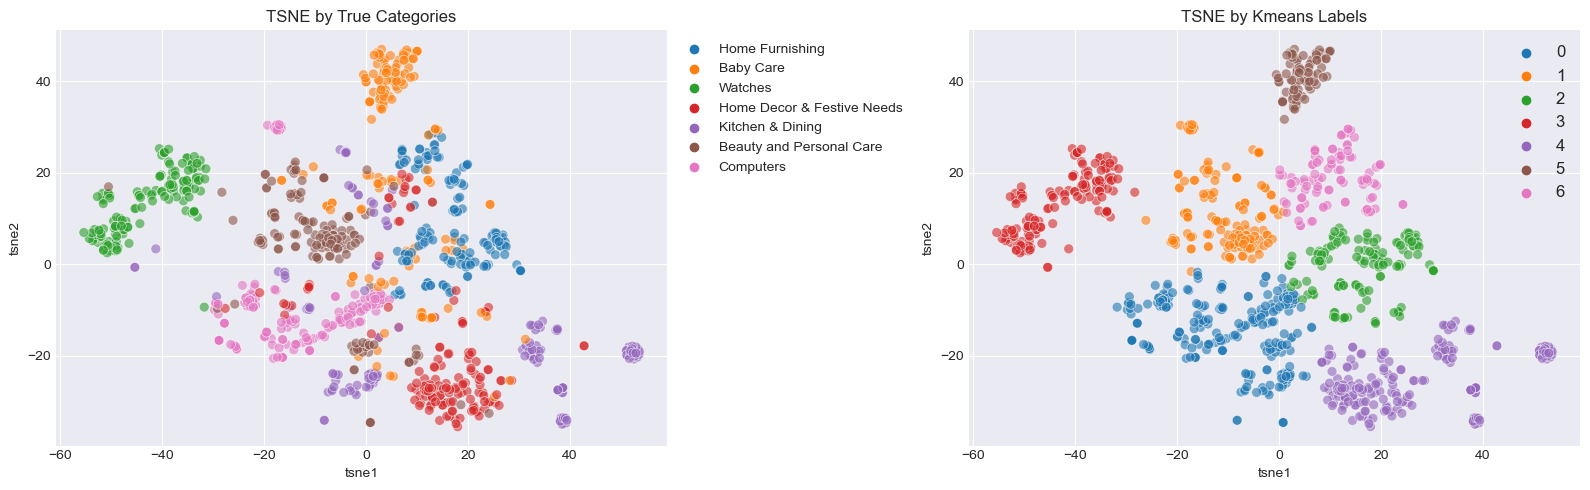

The Adjusted Rand Index is:  0.49


In [193]:
plot_tsne(embed_model.predict(sequences))

## Pretrained Models

### BERT

In [194]:
import transformers
from transformers import pipeline, BertTokenizer, TFBertModel, TFAutoModel, DistilBertTokenizer, TFDistilBertModel
from sentence_transformers import SentenceTransformer
from transformers import TFAutoModelForTokenClassification

Pretrained Model : bert-base-uncased

In [195]:
def use_bert_model(model):
    tokenizer = BertTokenizer.from_pretrained(model)
    model = TFBertModel.from_pretrained(model)
    encoded_input = tokenizer(
        list(text_data["preprocessing_with_sw"]), return_tensors="tf", padding="max_length", truncation=True, max_length = 200,
    )
    output = model(encoded_input)
    return np.array(output.last_hidden_state).mean(axis=1)

In [196]:
output = use_bert_model("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

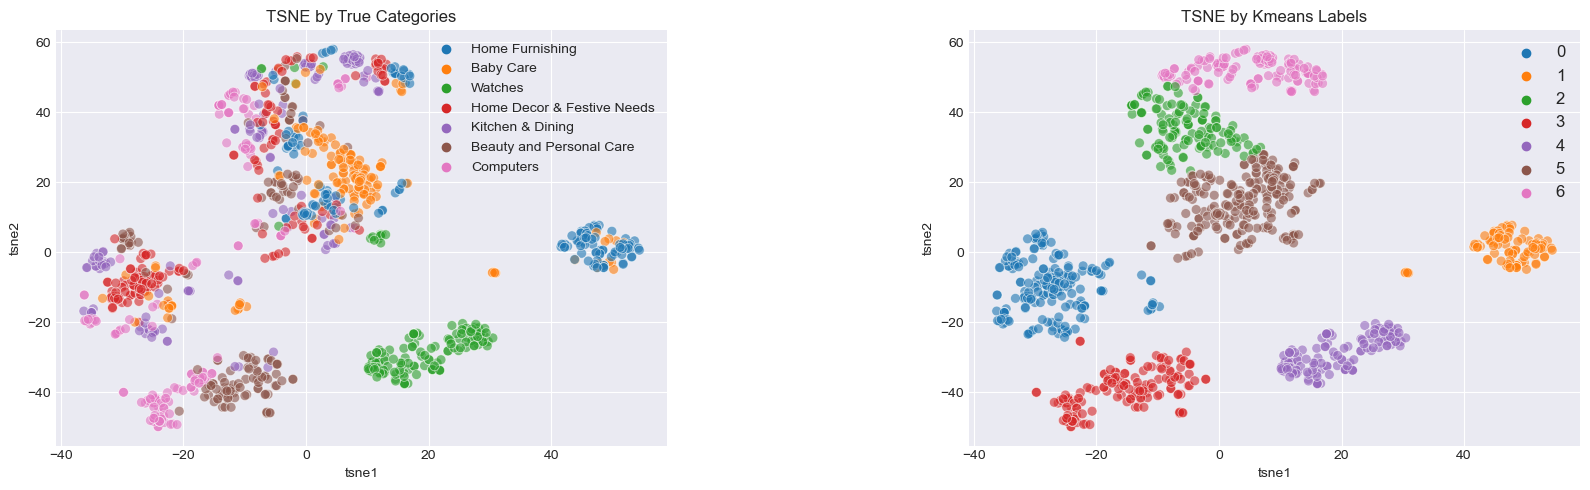

The Adjusted Rand Index is:  0.28


In [197]:
plot_tsne(output)

Pretrained Model: cnicu/product_classifier

In [198]:
def use_distilbert_model(model):
    tokenizer = DistilBertTokenizer.from_pretrained(model)
    model = TFDistilBertModel.from_pretrained(model, from_pt=True)
    encoded_input = tokenizer(
        list(text_data["preprocessing_with_sw"]), return_tensors="tf", padding="max_length", truncation=True, max_length = 200,
    )
    output = model(encoded_input)
    return np.array(output.last_hidden_state).mean(axis=1)

In [199]:
output = use_distilbert_model("cnicu/product_classifier")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


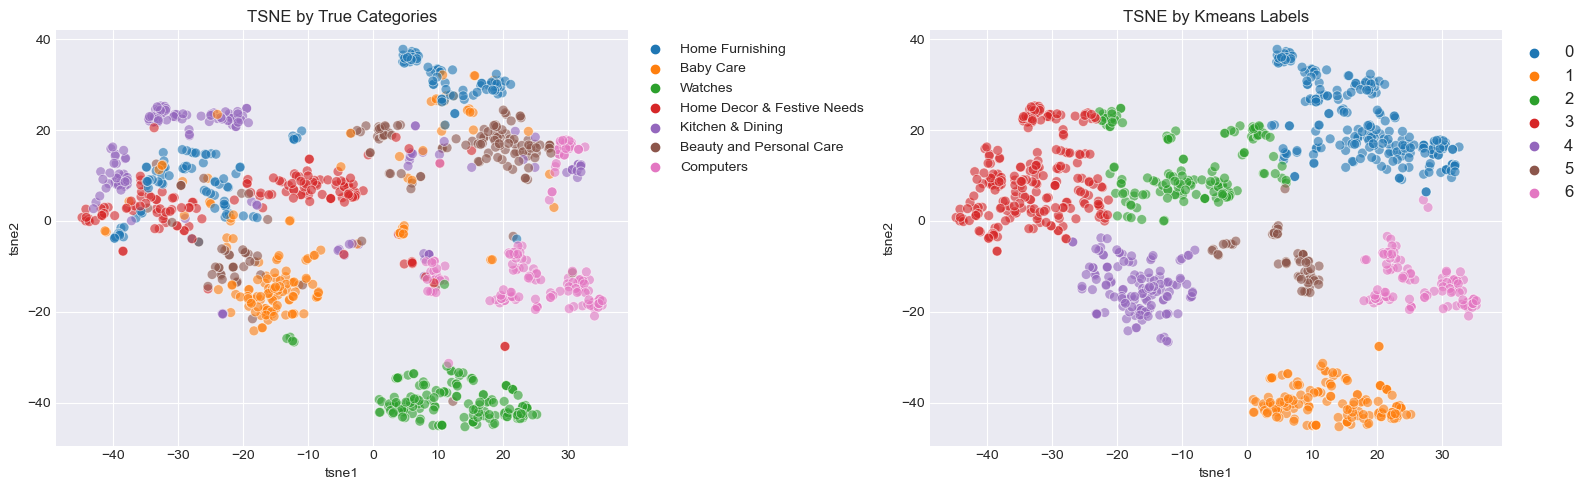

The Adjusted Rand Index is:  0.35


In [200]:
plot_tsne(output)

Sentence Transformer Pretrained Model: all-mpnet-base-v2

In [201]:
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", TFAutoModel)
embeddings = model.encode(list(text_data["preprocessing_with_sw"]))
print(embeddings)

[[-0.00441953 -0.04301028 -0.00248617 ... -0.00651411  0.05115686
   0.00244506]
 [-0.0295813  -0.04845785 -0.00606968 ... -0.00019898  0.0339835
   0.00054783]
 [-0.03357348 -0.09297045 -0.00481585 ... -0.01289036  0.01627186
  -0.02344796]
 ...
 [ 0.05655698 -0.00439403  0.01881683 ... -0.03352133  0.00214059
  -0.03028686]
 [ 0.05605642 -0.02331236  0.00422536 ... -0.0490934  -0.02247079
  -0.01607664]
 [ 0.08084045 -0.01310348  0.00588496 ... -0.03926184 -0.04106209
  -0.02352138]]


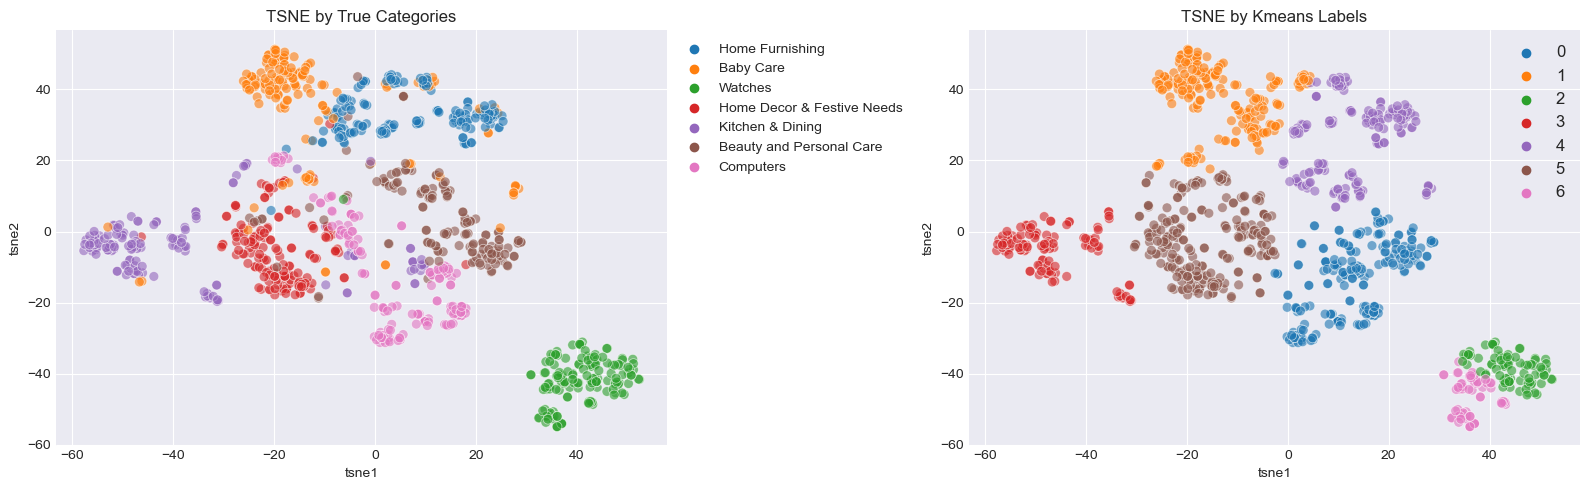

The Adjusted Rand Index is:  0.46


In [202]:
plot_tsne(embeddings)

### Universal Sentence Encoder 

In [203]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [204]:
use_embeddings = embed(list(text_data["preprocessing_with_sw"]))
use_embeddings

2023-11-04 19:14:35.468141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string
	 [[{{node inputs}}]]


<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.04915561,  0.01841275,  0.0030733 , ...,  0.05511419,
         0.05146017,  0.0054757 ],
       [-0.01409803, -0.03418813, -0.01714735, ...,  0.04318698,
         0.04094348,  0.03853383],
       [-0.05674154,  0.03584264, -0.05044362, ...,  0.05672332,
        -0.0058916 , -0.02548094],
       ...,
       [-0.03492105, -0.04581486, -0.01617063, ...,  0.0130889 ,
         0.06055967, -0.037045  ],
       [-0.03028691, -0.03737516,  0.03419068, ...,  0.05081065,
        -0.00913033, -0.01749554],
       [-0.05005059, -0.03637043,  0.05235622, ...,  0.05288222,
        -0.03370759, -0.00520793]], dtype=float32)>

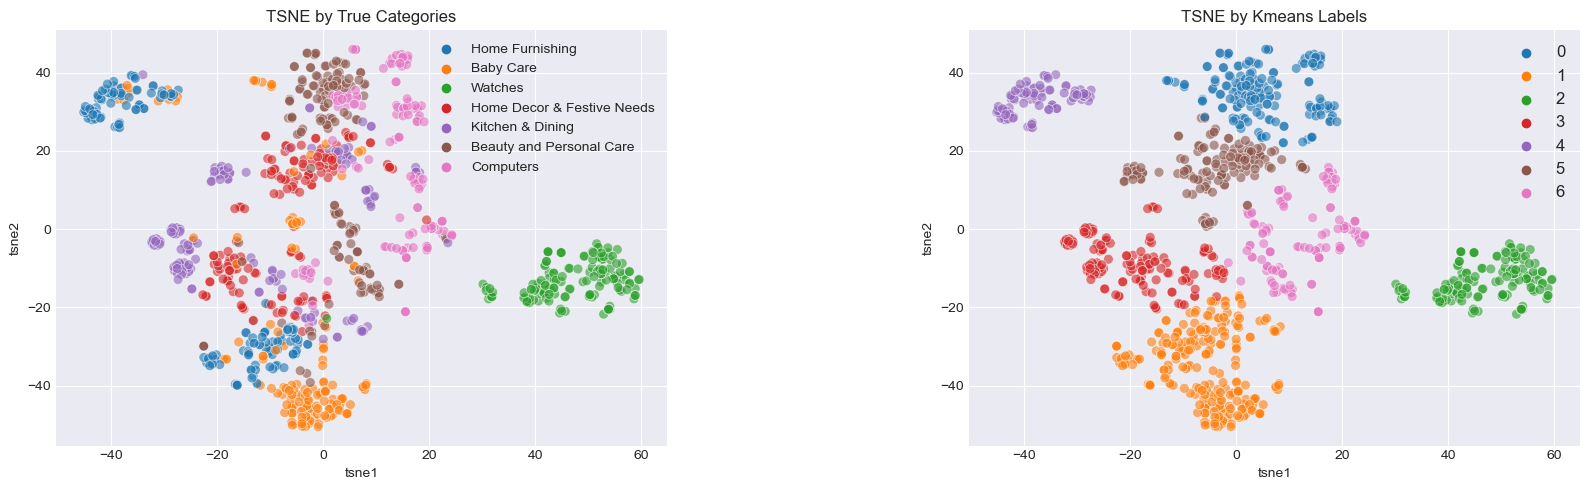

The Adjusted Rand Index is:  0.39


In [205]:
plot_tsne(use_embeddings)

# Image Analysis

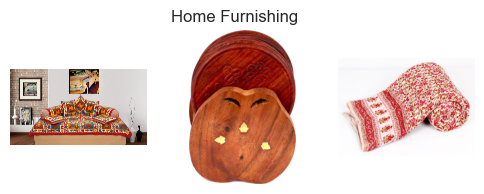

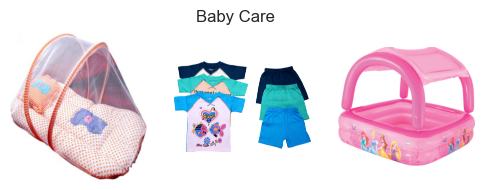

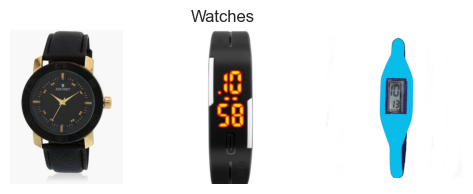

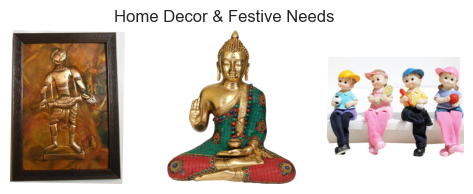

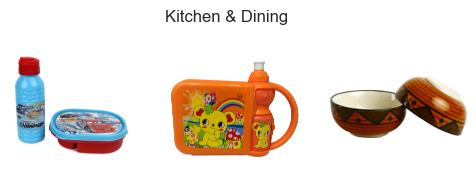

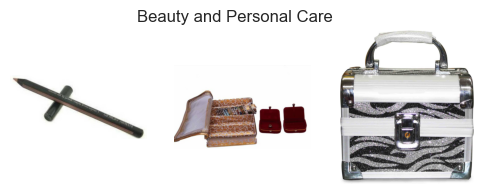

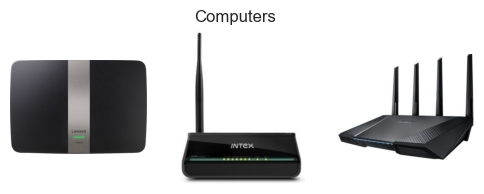

In [206]:
def list_images_by_category(category):
    return [
        data["image"][i] for i in range(len(data)) if data["category"][i] == category
    ]


home_furnishing_images = list_images_by_category("Home Furnishing")
baby_care_images = list_images_by_category("Baby Care")
watches_images = list_images_by_category("Watches")
home_decor_images = list_images_by_category("Home Decor & Festive Needs")
kitchen_images = list_images_by_category("Kitchen & Dining")
beauty_images = list_images_by_category("Beauty and Personal Care")
computers_images = list_images_by_category("Computers")

for name in data["category"].unique():
    fig = plt.figure(figsize=(6, 2))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_images_by_category(name)[i + 10]
        image = imread(path + filename)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.suptitle(name)
    plt.show()

## SIFT

Identifying keypoints and associated descriptors for each image 

In [207]:
sift = cv2.SIFT_create()
sift_keypoints = []
for image_num in range(len(image_list)):
    image = cv2.imread(path + image_list[image_num], 0)
    image = cv2.equalizeHist(image)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sift_keypoints.append(descriptors)

sift_keypoints_by_image = np.asarray(sift_keypoints, dtype="object")
sift_keypoints_all = np.concatenate(sift_keypoints_by_image, axis=0)

Example of an image's descriptors

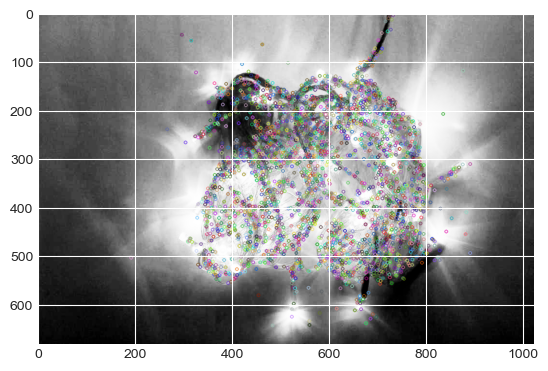

Descriptors :  (3025, 128)

[[ 34.  12.   0. ...   0.   0.   0.]
 [ 25.  19.   0. ...   0.   0.   0.]
 [  0.   3.   9. ...   1.   2.  61.]
 ...
 [ 73.   0.   0. ...   3.  25.   6.]
 [108.  43.   0. ...   0.   1.  82.]
 [ 53.   0.   0. ...  52.   1.   1.]]


In [208]:
img = cv2.drawKeypoints(image, keypoints, image)
plt.imshow(img)
plt.show()
print("Descriptors : ", descriptors.shape)
print()
print(descriptors)

In [209]:
len(sift_keypoints_all)

9051319

Feature clustering for all images => creation of visual words ? 

In [210]:
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Estimated number of clusters: ", k)
print("Creation of ", k, " clusters of descriptors ...")

kmeans = MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0)
e = kmeans.fit(sift_keypoints_all)

Estimated number of clusters:  3009
Creation of  3009  clusters of descriptors ...


/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Building a histogram for each image to indicate the frequency of each visual word within the image

In [211]:
histogram_vectors = []


def build_histogram(kmeans, descriptors, image_num):
    result = kmeans.predict(descriptors)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(descriptors)
    if nb_des == 0:
        print("error encountered for image  : ", image_num)
    for i in result:
        hist[i] += 1.0 / nb_des
    return hist


for i, image_description in enumerate(sift_keypoints_by_image):
    if i % 100 == 0:
        print(i)
    hist = build_histogram(kmeans, image_description, i)
    histogram_vectors.append(hist)

image_features = np.asarray(histogram_vectors)

0
100
200
300
400
500
600
700
800
900
1000


### PCA

Reducing the dataset's dimension using PCA

In [212]:
print("Dataset dimension before PCA: ", image_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(image_features)
print("Dataset dimension after PCA: ", feat_pca.shape)

Dataset dimension before PCA:  (1050, 3009)
Dataset dimension after PCA:  (1050, 744)


### TSNE

Reducing further using TSNE

In [213]:
tsne = manifold.TSNE(
    n_components=2, perplexity=30, n_iter=2000, init="random", random_state=6
)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
df_tsne["category"] = data["category"]
print(df_tsne.shape)

(1050, 3)


Plotting TSNE results by the real categories

In [214]:
def plot_tsne(tsne, hue):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=hue,
        data=tsne,
        legend="brief",
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
    )

    plt.title("TSNE by category", fontsize=25, pad=10, fontweight="bold")
    plt.xlabel("tsne1", fontsize=20, fontweight="bold")
    plt.ylabel("tsne2", fontsize=20, fontweight="bold")
    plt.legend(prop={"size": 14}, bbox_to_anchor=(1, 1))

    plt.show()

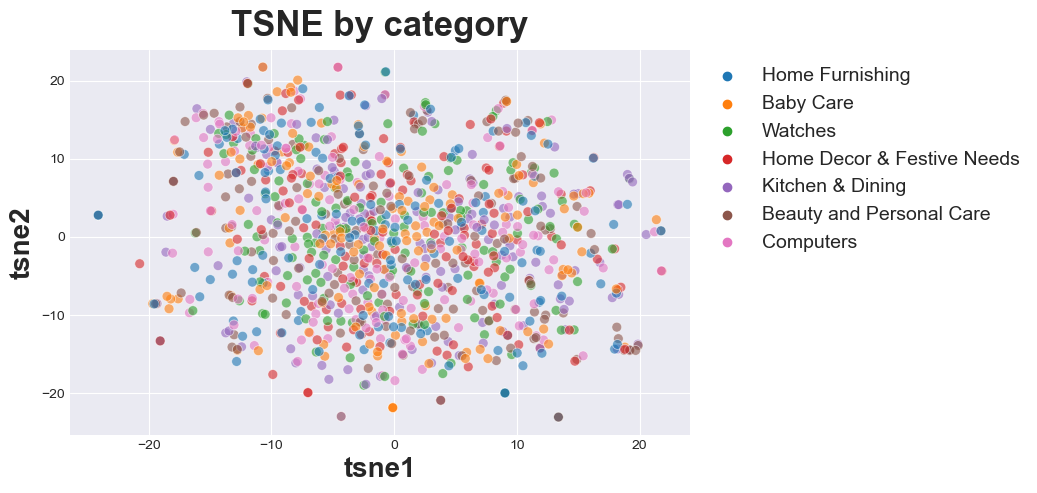

In [215]:
plot_tsne(df_tsne, "category")

There is no obvious cluster separation by category

### Supervised learning

### Analysing differences between actual categories and predicted clusters

Creating clusters from TSNE

In [216]:
cls = KMeans(n_clusters=7, random_state=6, n_init="auto")
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


Plotting TSNE by clusters

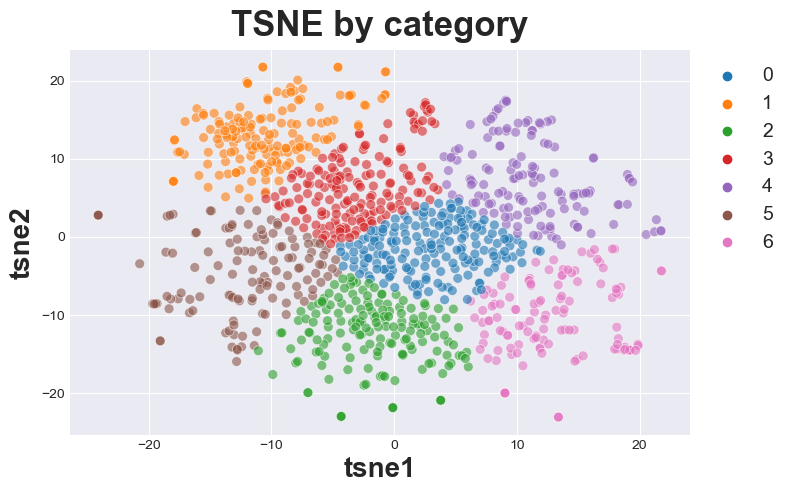

In [217]:
plot_tsne(df_tsne, "cluster")

Calculating ARI score between clusters and categories

In [218]:
labels = data["encoded_category"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

ARI :  0.0005230203748590864


The ARI score confirms the inability to successfully and confidently predict an image's category based on its features using SIFT

In [219]:
df_tsne.groupby("cluster").count()["class"]

KeyError: 'class'

In [ ]:
np.unique(cls.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [ ]:
confusion_matrix(labels, cls.labels_)

array([[25, 26, 29, 24, 17, 15, 14],
       [16, 21, 21, 25, 21, 20, 26],
       [21, 28, 30, 20, 19, 19, 13],
       [34, 16, 25, 28, 20, 12, 15],
       [26, 29, 17, 22, 17, 20, 19],
       [30, 18, 20, 23, 19, 18, 22],
       [27, 18, 19, 27, 22, 24, 13]])

              precision    recall  f1-score   support

           0       0.06      0.05      0.06       150
           1       0.07      0.09      0.08       150
           2       0.00      0.00      0.00       150
           3       0.04      0.05      0.04       150
           4       0.38      0.47      0.42       150
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       150

    accuracy                           0.10      1050
   macro avg       0.08      0.10      0.09      1050
weighted avg       0.08      0.10      0.09      1050



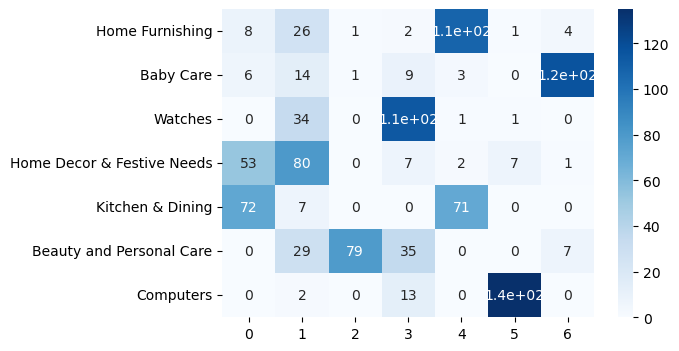

In [ ]:
def conf_mat_transform(y_true, y_pred, corresp):
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels["y_pred"] = y_pred
    labels["y_pred_transform"] = labels["y_pred"].apply(lambda x: corresp[x])

    return labels["y_pred_transform"]


cls_labels_transform = conf_mat_transform(labels, cls.labels_, [6, 5, 4, 3, 1, 2, 0])
matrix = confusion_matrix(labels, cls_labels_transform)
print(classification_report(labels, cls_labels_transform))

df_cm = pd.DataFrame(
    matrix, index=[label for label in categories], columns=[i for i in "0123456"]
)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

The categories that were most successfully predicted are computers and home decors. 

The overall precision is pretty low 

## CNN

In [ ]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
images_features = []
i = 0
for image_file in data["image"]:
    if i % 100 == 0:
        print(i)
    i += 1
    image = load_img(path + image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0])

images_features = np.asarray(images_features)

0


2023-10-08 12:19:03.866310: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100
200
300
400
500
600


/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

In [ ]:
print("Before PCA:", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)
print("After PCA:", feat_pca.shape)

Before PCA: (1050, 4096)
After PCA: (1050, 803)


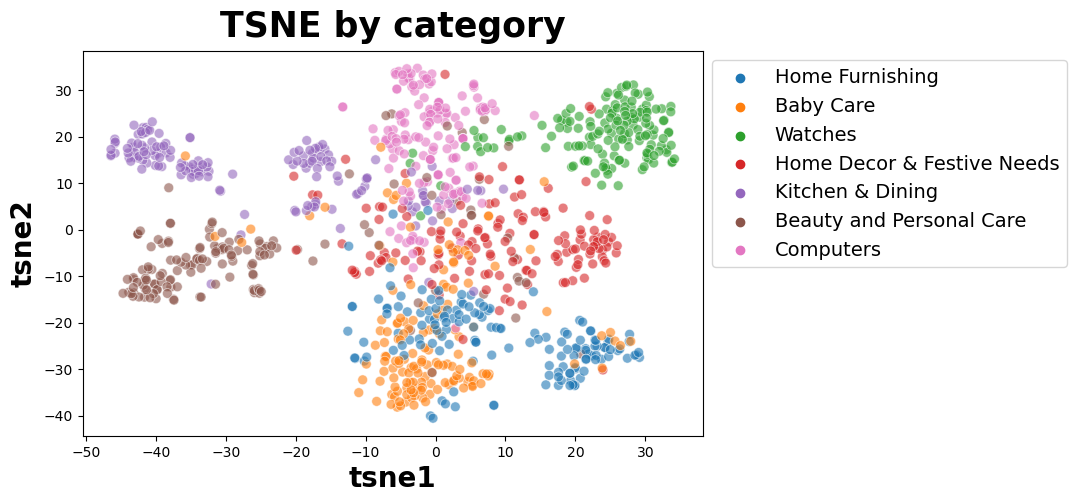

In [ ]:
tsne = manifold.TSNE(
    n_components=2, perplexity=30, n_iter=2000, init="random", random_state=6
)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne, columns=["tsne1", "tsne2"])
df_tsne["category"] = data["category"]

plot_tsne(df_tsne, "category")

The category separation is more obvious using CNN compared to the SIFT algorithm.

This suggests that using CNN it is possible to effectively predict an image's category

In [ ]:
cls = KMeans(n_clusters=7, n_init="auto")
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init='auto')

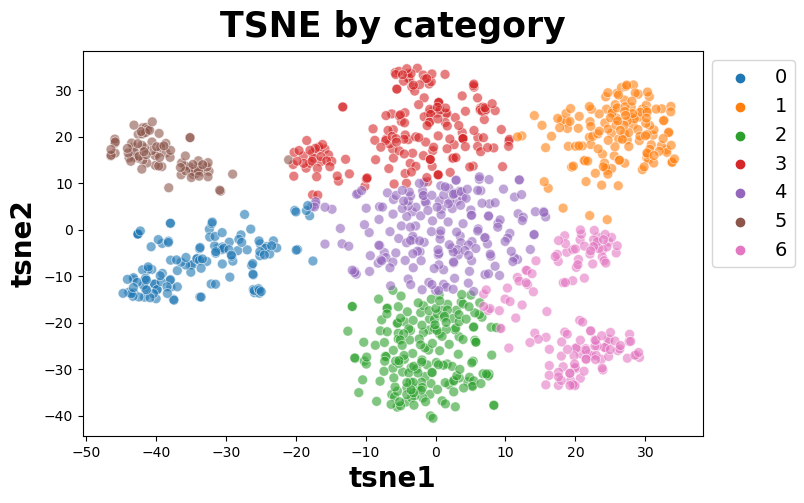

ARI :  0.4533011716355961


In [ ]:
df_tsne["cluster"] = cls.labels_

plot_tsne(df_tsne, "cluster")

labels = data["encoded_category"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

The ARI is much better than the one obtained with SIFT

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       150
           1       0.91      0.78      0.84       150
           2       0.63      0.76      0.69       150
           3       0.42      0.53      0.47       150
           4       0.52      0.48      0.50       150
           5       0.98      0.53      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.67      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.71      0.67      0.68      1050



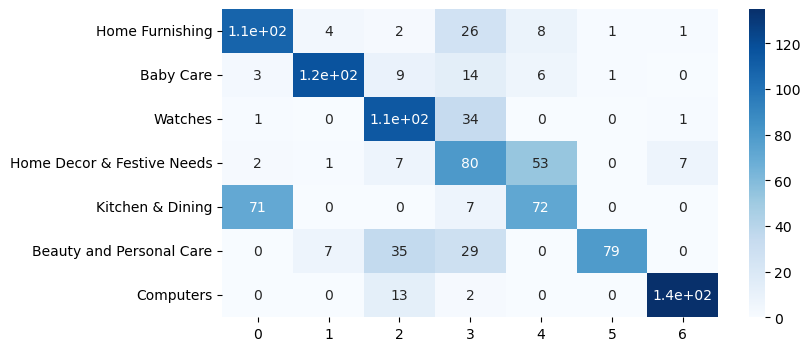

In [ ]:
matrix = confusion_matrix(labels, cls.labels_)
cls_labels_transform = conf_mat_transform(
    labels, cls.labels_, np.argmax(matrix, axis=0)
)
matrix_transform = confusion_matrix(labels, cls_labels_transform)
print(classification_report(labels, cls_labels_transform))

df_cm = pd.DataFrame(
    matrix_transform,
    index=[label for label in categories],
    columns=[i for i in "0123456"],
)
plt.figure(figsize=(8, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

The most difficult categories to predict are Kitchen and Dining, which is often misclassified as Home Furnishing, and beauty and personnal care.